In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alincijov/self-driving-cars")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/alincijov/self-driving-cars/versions/4/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
15131,1478731985465277461.jpg,71,106,139,161,1
109216,1479504300365736778.jpg,141,314,142,261,1
40164,1478897125459992395.jpg,360,421,140,159,1
34502,1478896652432874876.jpg,335,398,140,178,1
104644,1479503876337376191.jpg,271,278,138,145,1


In [ ]:
classes = df.class_id.unique()
print(classes)

[1 3 5 2 4]


In [ ]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [ ]:
boxes = {}
images = {}

base_path = '/root/.cache/kagglehub/datasets/alincijov/self-driving-cars/versions/4/images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

In [ ]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [ ]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [ ]:
model = YOLO("yolov8m.pt")

In [ ]:
results=model.predict(source="/root/.cache/kagglehub/datasets/alincijov/self-driving-cars/versions/4/images/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /root/.cache/kagglehub/datasets/alincijov/self-driving-cars/versions/4/images/1478019956680248165.jpg: 416x640 1 car, 1 truck, 1086.2ms
Speed: 2.9ms preprocess, 1086.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


In [ ]:
result = results[0]
box = result.boxes[0]

In [ ]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [ ]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.6882781982422, 148.7809295654297, 162.10047912597656]
Probability: 0.7161701321601868


In [ ]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [ ]:
results1 = model.predict(source="/root/.cache/kagglehub/datasets/alincijov/self-driving-cars/versions/4/images/1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /root/.cache/kagglehub/datasets/alincijov/self-driving-cars/versions/4/images/1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 1342.7ms
Speed: 3.5ms preprocess, 1342.7ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


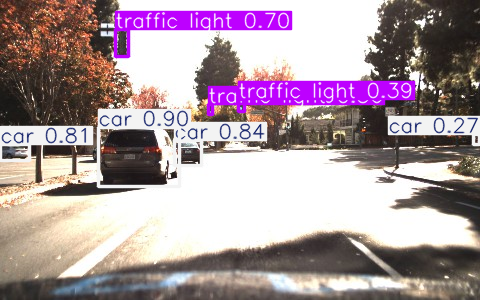

In [ ]:
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


# New Section